In [ ]:
#Mini Project 1-Stock Market Analysis Using Python

In [ ]:
"""
Objective: 
Use Python libraries such as Pandas, Seaborn, and Matplotlib to extract and analyze the information, visualize it, and look at different ways to analyze the risk of a stock, based on its performance history.
About the Data: The stocks we have chosen are from various industries and market caps namely:
•Apple
•Google
•Microsoft
•Amazon
"""

In [1]:
#Task1: Read the Data from Yahoo finance website directly

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stock_data=yf.download(['AAPL','GOOG','MSFT','AMZN'], start='2023-09-22', end='2023-10-21', group_by='ticker')
stock_data.head()

[*********************100%%**********************]  4 of 4 completed


AMZN                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2023-09-22  131.110001  132.029999  128.520004  129.119995  129.119995   
2023-09-25  129.360001  131.779999  128.770004  131.270004  131.270004   
2023-09-26  130.119995  130.389999  125.279999  125.980003  125.980003   
2023-09-27  125.760002  127.480003  124.129997  125.980003  125.980003   
2023-09-28  124.040001  126.580002  123.040001  125.980003  125.980003   

                            MSFT                                      ...  \
              Volume        Open        High         Low       Close  ...   
Date                                                                  ...   
2023-09-22  59904300  321.320007  321.450012  316.149994  317.010010  ...   
2023-09-25  46017800  316.589996  317.670013  315.000000  317.540009  ...   
2023-09-26  73048200  315.130005  315.880005  310.019989  312.140015  ...   
2023-09-27  66553400  312.299988  314.299988  309.690002  312.790009  ...   
2023-09-28  54555000  310.989990  315.480011  309.450012  313.640015  ...   

                  AAPL                                          GOOG  \
                   Low       Close   Adj Close    Volume        Open   
Date                                                                   
2023-09-22  174.050003  174.789993  174.789993  56725400  131.679993   
2023-09-25  174.149994  176.080002  176.080002  46172700  130.770004   
2023-09-26  171.660004  171.960007  171.960007  64588900  130.914001   
2023-09-27  169.050003  170.429993  170.429993  66921800  129.440002   
2023-09-28  167.619995  170.690002  170.690002  56294400  130.690002   

                                                                      
                  High         Low       Close   Adj Close    Volume  
Date                                                                  
2023-09-22  133.009995  130.509995  131.250000  131.250000  17348700  
2023-09-25  132.220001  130.029999  132.169998  132.169998  14650000  
2023-09-26  131.404999  128.190002  129.449997  129.449997  20378800  
2023-09-27  131.720001  129.380005  131.460007  131.460007  18764200  
2023-09-28  134.179993  130.690002  133.130005  133.130005  18201400  

[5 rows x 24 columns]

In [3]:
#Load the stocks of Amazon,Apple,Google and Microsoft stock data for last 1 month in respective dataframes
amzn_df=stock_data['AMZN']
aapl_df=stock_data['AAPL']
goog_df=stock_data['GOOG']
msft_df=stock_data['MSFT']

In [4]:
#Task2: Perform cleaning

#Check for null values. Convert null values(if any) to zero.

stock_data.isnull().sum()

AMZN  Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
MSFT  Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
AAPL  Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
GOOG  Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
dtype: int64

In [5]:
#Task3: Find out what was the change in stock price over time
#Add a column 'Daily Price Change' to the dataframes

import warnings
warnings.filterwarnings("ignore")

amzn_df.loc[:,'Daily Price Change']=amzn_df['Adj Close'].diff()
print("Amazon Dataframe after Task1:")
print(amzn_df)

aapl_df.loc[:,'Daily Price Change']=aapl_df['Adj Close'].diff()
print("Apple Dataframe after Task1:")
print(aapl_df)

goog_df.loc[:,'Daily Price Change']=goog_df['Adj Close'].diff()
print("Google Dataframe after Task1:")
print(goog_df)

msft_df.loc[:,'Daily Price Change']=msft_df['Adj Close'].diff()
print("Microsoft Dataframe after Task1:")
print(msft_df)

Amazon Dataframe after Task1:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-09-22  131.110001  132.029999  128.520004  129.119995  129.119995   
2023-09-25  129.360001  131.779999  128.770004  131.270004  131.270004   
2023-09-26  130.119995  130.389999  125.279999  125.980003  125.980003   
2023-09-27  125.760002  127.480003  124.129997  125.980003  125.980003   
2023-09-28  124.040001  126.580002  123.040001  125.980003  125.980003   
2023-09-29  128.199997  129.149994  126.320000  127.120003  127.120003   
2023-10-02  127.279999  130.470001  126.540001  129.460007  129.460007   
2023-10-03  128.059998  128.520004  124.250000  124.720001  124.720001   
2023-10-04  126.059998  127.360001  125.680000  127.000000  127.000000   
2023-10-05  126.709999  126.730003  124.330002  125.959999  125.959999   
2023-10-06  124.160004  128.449997  124.129997  127.959999  127.959999   
2023-10-

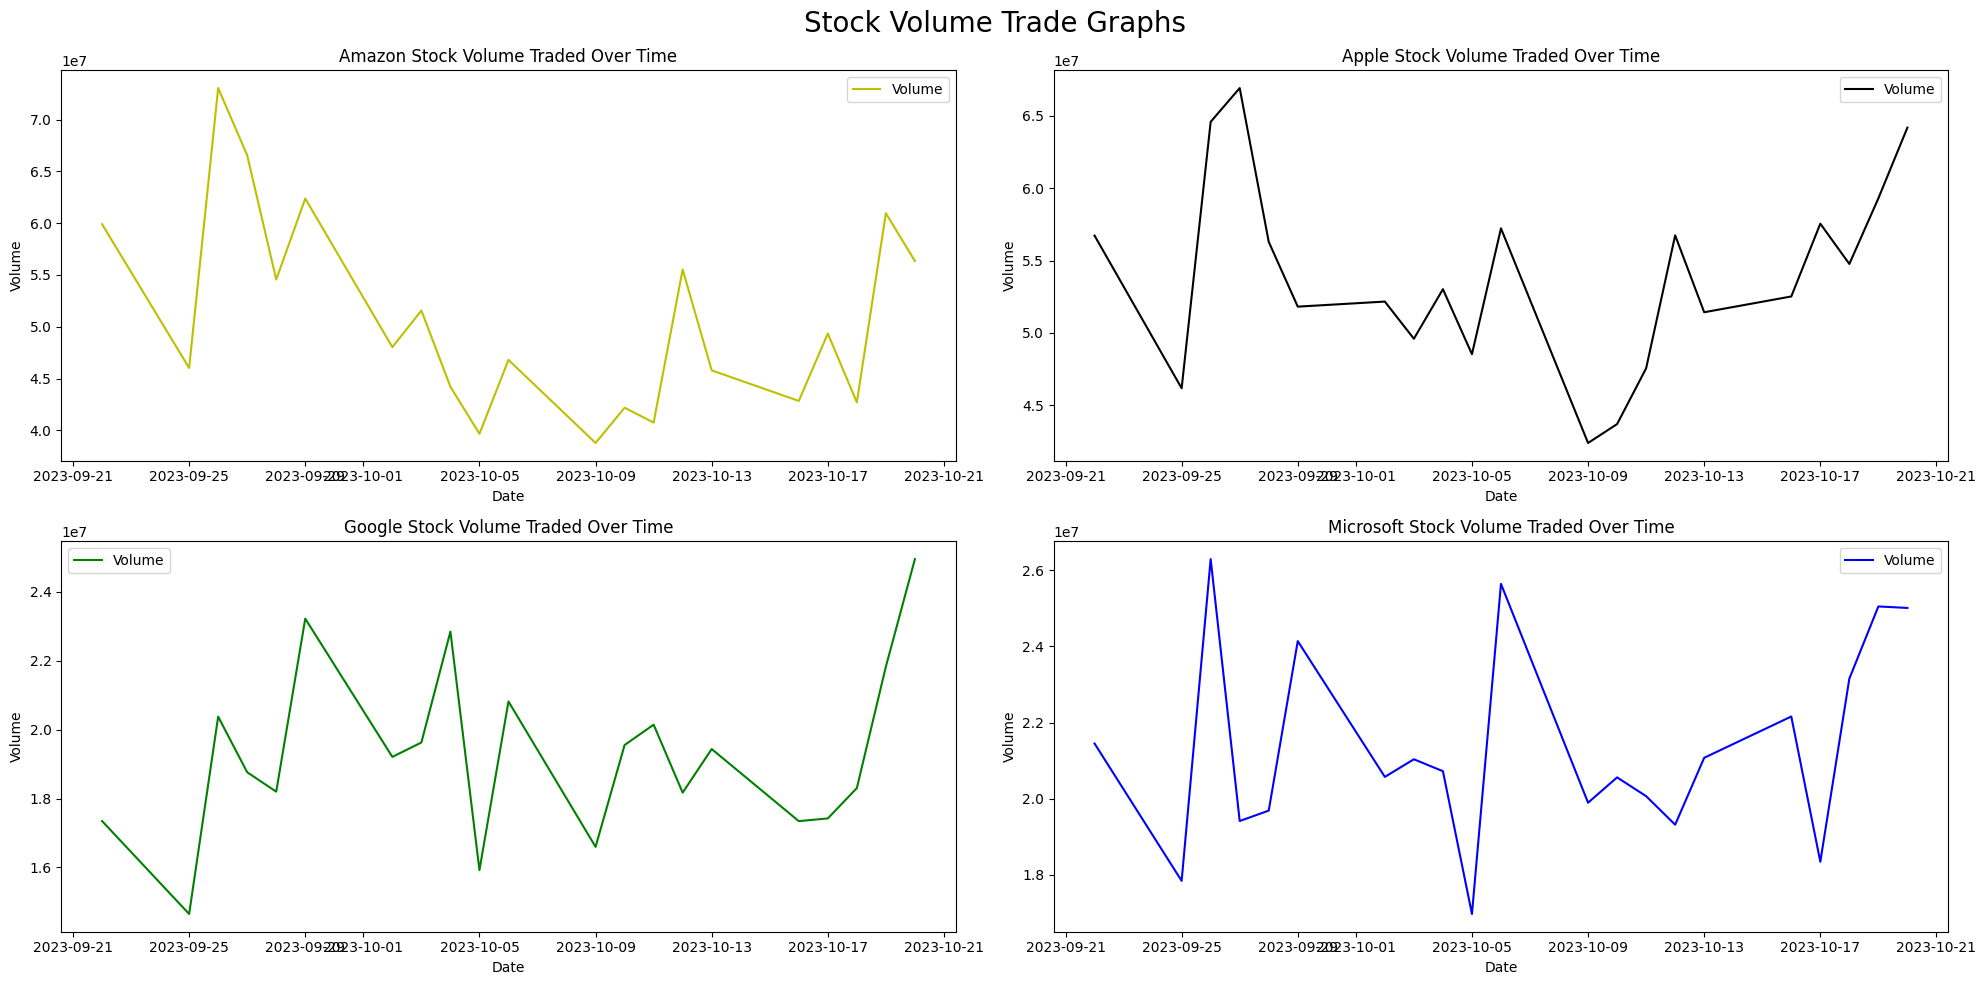

In [9]:
#Task4: Visualize the change in a stock’s volume being traded, over time

plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.suptitle("Stock Volume Trade Graphs",fontsize=20,fontweight=10)

plt.subplot(2,2,1)
plt.plot(amzn_df.index,amzn_df['Volume'],color='y',label='Volume')
plt.title('Amazon Stock Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

plt.subplot(2,2,2)
plt.plot(aapl_df.index,aapl_df['Volume'],color='k',label='Volume')
plt.title('Apple Stock Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

plt.subplot(2,2,3)
plt.plot(goog_df.index,goog_df['Volume'],color='g',label='Volume')
plt.title('Google Stock Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

plt.subplot(2,2,4)
plt.plot(msft_df.index,msft_df['Volume'],color='b',label='Volume')
plt.title('Microsoft Stock Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
#Task5: Find out what was the moving average of various stocks
#Add a column '10-Day Moving Avg' to the dataframes

amzn_df.loc[:,'10-Day Moving Avg']=amzn_df['Adj Close'].rolling(window=10).mean()
print("Amazon Dataframe after Task5:")
print(amzn_df)

aapl_df.loc[:,'10-Day Moving Avg']=aapl_df['Adj Close'].rolling(window=10).mean()
print("Apple Dataframe after Task5:")
print(aapl_df)

goog_df.loc[:,'10-Day Moving Avg']=goog_df['Adj Close'].rolling(window=10).mean()
print("Google Dataframe after Task5:")
print(goog_df)

msft_df.loc[:,'10-Day Moving Avg']=msft_df['Adj Close'].rolling(window=10).mean()
print("Microsoft Dataframe after Task5:")
print(msft_df)

Amazon Dataframe after Task5:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-09-22  131.110001  132.029999  128.520004  129.119995  129.119995   
2023-09-25  129.360001  131.779999  128.770004  131.270004  131.270004   
2023-09-26  130.119995  130.389999  125.279999  125.980003  125.980003   
2023-09-27  125.760002  127.480003  124.129997  125.980003  125.980003   
2023-09-28  124.040001  126.580002  123.040001  125.980003  125.980003   
2023-09-29  128.199997  129.149994  126.320000  127.120003  127.120003   
2023-10-02  127.279999  130.470001  126.540001  129.460007  129.460007   
2023-10-03  128.059998  128.520004  124.250000  124.720001  124.720001   
2023-10-04  126.059998  127.360001  125.680000  127.000000  127.000000   
2023-10-05  126.709999  126.730003  124.330002  125.959999  125.959999   
2023-10-06  124.160004  128.449997  124.129997  127.959999  127.959999   
2023-10-

In [11]:
#Task6: Find out what was the daily average return of a stock
#Add a column 'Daily Return' to the dataframes

amzn_df.loc[:,'Daily Return']=(amzn_df['Adj Close'].pct_change())*100
print("Amazon Dataframe after Task6:")
print(amzn_df)

aapl_df.loc[:,'Daily Return']=(aapl_df['Adj Close'].pct_change())*100
print("Apple Dataframe after Task6:")
print(aapl_df)

goog_df.loc[:,'Daily Return']=(goog_df['Adj Close'].pct_change())*100
print("Google Dataframe after Task6:")
print(goog_df)

msft_df.loc[:,'Daily Return']=(msft_df['Adj Close'].pct_change())*100
print("Microsoft Dataframe after Task6:")
print(msft_df)

Amazon Dataframe after Task6:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-09-22  131.110001  132.029999  128.520004  129.119995  129.119995   
2023-09-25  129.360001  131.779999  128.770004  131.270004  131.270004   
2023-09-26  130.119995  130.389999  125.279999  125.980003  125.980003   
2023-09-27  125.760002  127.480003  124.129997  125.980003  125.980003   
2023-09-28  124.040001  126.580002  123.040001  125.980003  125.980003   
2023-09-29  128.199997  129.149994  126.320000  127.120003  127.120003   
2023-10-02  127.279999  130.470001  126.540001  129.460007  129.460007   
2023-10-03  128.059998  128.520004  124.250000  124.720001  124.720001   
2023-10-04  126.059998  127.360001  125.680000  127.000000  127.000000   
2023-10-05  126.709999  126.730003  124.330002  125.959999  125.959999   
2023-10-06  124.160004  128.449997  124.129997  127.959999  127.959999   
2023-10-

In [12]:
#Task7: Add a new column ‘Trend’ whose values are based on the 'Daily Return'

amzn_df.loc[:,'Trend']=["Up" if pct>0 else "Down" if pct<0 else "No Change" for pct in amzn_df['Daily Return']]
print("Amazon Dataframe after Task7:")
print(amzn_df)


aapl_df.loc[:,'Trend']=["Up" if pct>0 else "Down" if pct<0 else "No Change" for pct in aapl_df['Daily Return']]
print("Apple Dataframe after Task7:")
print(aapl_df)


goog_df.loc[:,'Trend']=["Up" if pct>0 else "Down" if pct<0 else "No Change" for pct in goog_df['Daily Return']]
print("Google Dataframe after Task7:")
print(goog_df)


msft_df.loc[:,'Trend']=["Up" if pct>0 else "Down" if pct<0 else "No Change" for pct in msft_df['Daily Return']]
print("Microsoft Dataframe after Task7:")
print(msft_df)



Amazon Dataframe after Task7:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-09-22  131.110001  132.029999  128.520004  129.119995  129.119995   
2023-09-25  129.360001  131.779999  128.770004  131.270004  131.270004   
2023-09-26  130.119995  130.389999  125.279999  125.980003  125.980003   
2023-09-27  125.760002  127.480003  124.129997  125.980003  125.980003   
2023-09-28  124.040001  126.580002  123.040001  125.980003  125.980003   
2023-09-29  128.199997  129.149994  126.320000  127.120003  127.120003   
2023-10-02  127.279999  130.470001  126.540001  129.460007  129.460007   
2023-10-03  128.059998  128.520004  124.250000  124.720001  124.720001   
2023-10-04  126.059998  127.360001  125.680000  127.000000  127.000000   
2023-10-05  126.709999  126.730003  124.330002  125.959999  125.959999   
2023-10-06  124.160004  128.449997  124.129997  127.959999  127.959999   
2023-10-

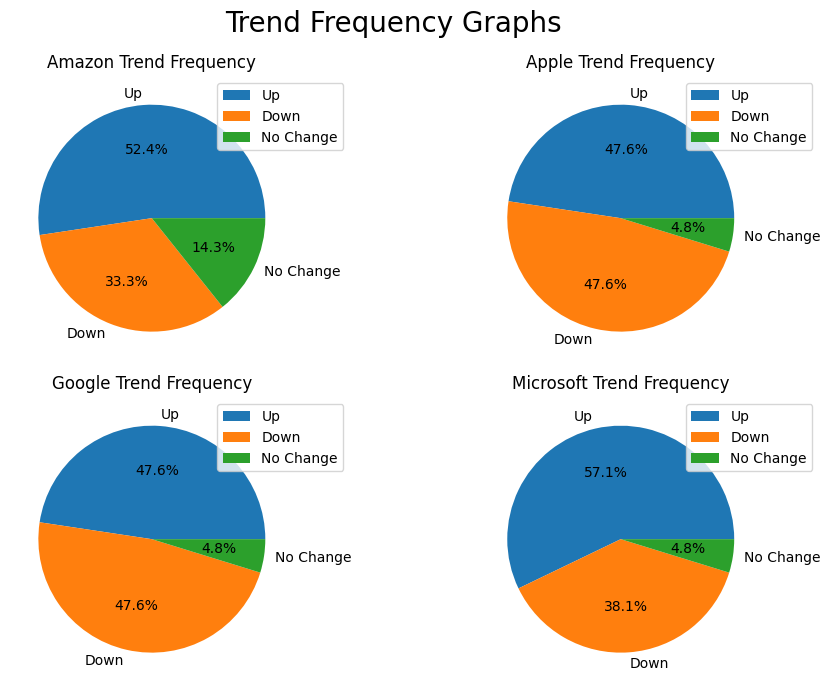

In [15]:
#Task8: Visualize trend frequency through a Pie Chart

plt.figure(figsize=(10,7))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.suptitle("Trend Frequency Graphs",fontsize=20,fontweight=10)


plt.subplot(2,2,1)
trend_count=amzn_df['Trend'].value_counts()
plt.pie(trend_count, labels=trend_count.index, autopct='%1.1f%%')
plt.legend(loc="upper right",bbox_to_anchor=(1.2,1))
plt.title("Amazon Trend Frequency")


plt.subplot(2,2,2)
trend_count=aapl_df['Trend'].value_counts()
plt.pie(trend_count, labels=trend_count.index, autopct='%1.1f%%')
plt.legend(loc="upper right",bbox_to_anchor=(1.2,1))
plt.title("Apple Trend Frequency")


plt.subplot(2,2,3)
trend_count=goog_df['Trend'].value_counts()
plt.pie(trend_count, labels=trend_count.index, autopct='%1.1f%%')
plt.legend(loc="upper right",bbox_to_anchor=(1.2,1))
plt.title("Google Trend Frequency")


plt.subplot(2,2,4)
trend_count=msft_df['Trend'].value_counts()
plt.pie(trend_count, labels=trend_count.index, autopct='%1.1f%%')
plt.legend(loc="upper right",bbox_to_anchor=(1.2,1))
plt.title("Microsoft Trend Frequency")


plt.tight_layout()
plt.show()

In [23]:
#Task9: Find out what was the correlation between the daily returns of different stocks

dly_ret_df=pd.DataFrame([])

dly_ret_df=pd.concat([dly_ret_df,amzn_df['Daily Return']],axis=1)
dly_ret_df.rename(columns={'Daily Return':'Amazon Daily Return'},inplace=True)

dly_ret_df=pd.concat([dly_ret_df,aapl_df['Daily Return']],axis=1)
dly_ret_df.rename(columns={'Daily Return':'Apple Daily Return'},inplace=True)

dly_ret_df=pd.concat([dly_ret_df,goog_df['Daily Return']],axis=1)
dly_ret_df.rename(columns={'Daily Return':'Google Daily Return'},inplace=True)

dly_ret_df=pd.concat([dly_ret_df,msft_df['Daily Return']],axis=1)
dly_ret_df.rename(columns={'Daily Return':'Microsoft Daily Return'},inplace=True)

dly_ret_df

,Amazon Daily Return,Apple Daily Return,Google Daily Return,Microsoft Daily Return
2023-09-22 00:00:00,NaN,NaN,NaN,NaN
2023-09-25 00:00:00,1.665125,0.738033,0.700951,0.167187
2023-09-26 00:00:00,-4.029863,-2.339843,-2.057957,-1.700571
2023-09-27 00:00:00,0.000000,-0.889750,1.552731,0.208238
2023-09-28 00:00:00,0.000000,0.152561,1.270347,0.271750
2023-09-29 00:00:00,0.904905,0.304648,-0.961465,0.672741
2023-10-02 00:00:00,1.840783,1.483554,2.518007,1.916069
2023-10-03 00:00:00,-3.661367,-0.776982,-1.383439,-2.613416
2023-10-04 00:00:00,1.828094,0.730864,2.228058,1.777331
2023-10-05 00:00:00,-0.818898,0.719797,-0.205474,0.125406


In [26]:
# correlation between column 1 and column 2
print("Correlation b/w Amazon and Apple Daily Returns: {0}".format(dly_ret_df['Amazon Daily Return'].corr(dly_ret_df['Apple Daily Return'])))
 
# correlation between column 1 and column 3
print("Correlation b/w Amazon and Google Daily Returns: {0}".format(dly_ret_df['Amazon Daily Return'].corr(dly_ret_df['Google Daily Return'])))
 
# correlation between column 1 and column 4
print("Correlation b/w Amazon and Microsoft Daily Returns: {0}".format(dly_ret_df['Amazon Daily Return'].corr(dly_ret_df['Microsoft Daily Return'])))

# correlation between column 2 and column 3
print("Correlation b/w Apple and Google Daily Returns: {0}".format(dly_ret_df['Apple Daily Return'].corr(dly_ret_df['Google Daily Return'])))
 
# correlation between column 2 and column 4
print("Correlation b/w Apple and Microsoft Daily Returns: {0}".format(dly_ret_df['Apple Daily Return'].corr(dly_ret_df['Microsoft Daily Return'])))
 
# correlation between column 3 and column 4
print("Correlation b/w Google and Microsoft Daily Returns: {0}".format(dly_ret_df['Google Daily Return'].corr(dly_ret_df['Microsoft Daily Return'])))

Correlation b/w Amazon and Apple Daily Returns: 0.798247127263621
Correlation b/w Amazon and Google Daily Returns: 0.8025078911361155
Correlation b/w Amazon and Microsoft Daily Returns: 0.8785449696784143
Correlation b/w Apple and Google Daily Returns: 0.6986136217222201
Correlation b/w Apple and Microsoft Daily Returns: 0.7924058941676999
Correlation b/w Google and Microsoft Daily Returns: 0.8585710287936221
